# BTC Fee Estimator - Internal Testing Report (Nov 9-10, 2022) 

## Summary

## Notebook Setup

### Libraries

Below are the libraries used in this notebook.

In [1]:
import pandas as pd
import pytz
import numpy as np 
import glob

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

import matplotlib.pyplot as plt

## Data 

In [2]:
m_files = glob.glob("*-m.csv")
m_files

['sim-0-m.csv',
 'sim-1-m.csv',
 'sim-2-m.csv',
 'sim-3-m.csv',
 'sim-4-m.csv',
 'sim-5-m.csv',
 'sim-6-m.csv',
 'sim-7-m.csv',
 'sim-8-m.csv',
 'sim-9-m.csv']

In [3]:
p_files = glob.glob("*-p.csv")
p_files

['sim-0-p.csv',
 'sim-1-p.csv',
 'sim-2-p.csv',
 'sim-3-p.csv',
 'sim-4-p.csv',
 'sim-5-p.csv',
 'sim-6-p.csv',
 'sim-7-p.csv',
 'sim-8-p.csv',
 'sim-9-p.csv']

In [4]:
df_list_m = []
df_list_p = []

In [5]:
for i, df in enumerate(m_files):
    temp_df_m = pd.read_csv("sim-" + str(i) + "-m.csv")
    df_list_m.append(temp_df_m)

In [6]:
for i, df in enumerate(p_files):
    temp_df_p = pd.read_csv("sim-" + str(i) + "-p.csv")
    df_list_p.append(temp_df_p)

Text(0, 0.5, 'Population')

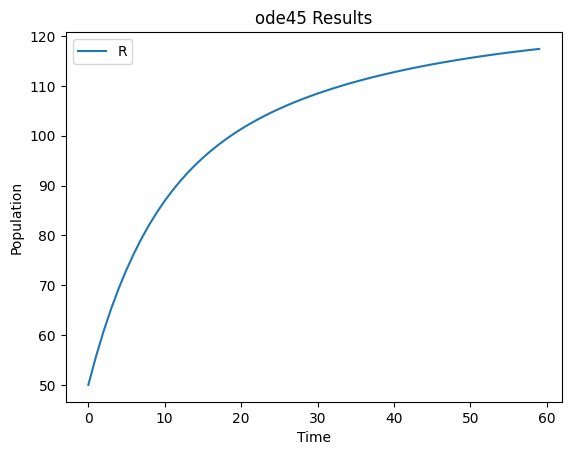

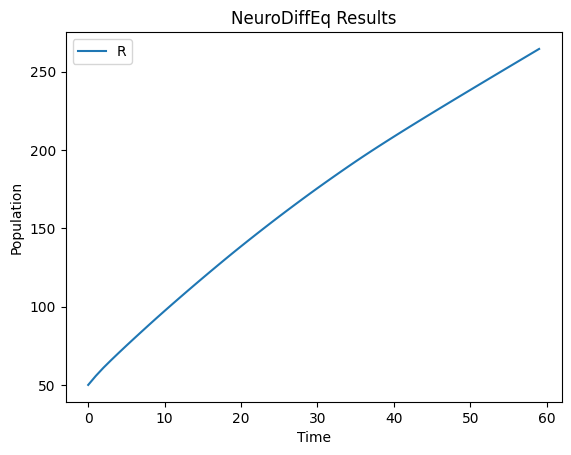

In [7]:
df_list_m[5].iloc[:, 4:].plot()
plt.title('ode45 Results')
plt.xlabel('Time')
plt.ylabel('Population')

df_list_p[5].iloc[:, 4:].plot()
plt.title('NeuroDiffEq Results')
plt.xlabel('Time')
plt.ylabel('Population')

In [8]:
S1 = []
S2 = []
S3 = []
S4 = []
S5 = []

for i in range(0,10):
    S1.append(mean_absolute_error(df_list_m[i].iloc[:, 1:2], df_list_p[i].iloc[:, 1:2]))
    S2.append(mean_absolute_percentage_error(df_list_m[i].iloc[:, 1:2], df_list_p[i].iloc[:, 1:2]))
    S3.append(mean_squared_error(df_list_m[i].iloc[:, 1:2], df_list_p[i].iloc[:, 1:2]))
    S4.append(max_error(df_list_m[i].iloc[:, 1:2], df_list_p[i].iloc[:, 1:2]))
    S5.append(median_absolute_error(df_list_m[i].iloc[:, 1:2], df_list_p[i].iloc[:, 1:2]))
    
S = pd.DataFrame(list(zip(S1, S2, S3, S4, S5)),
               columns =['MAE', 'MAPE', "MSE", 'Max', 'MedianAE'])

In [9]:
S

,MAE,MAPE,MSE,Max,MedianAE
0,33.623418,0.065247,2151.823593,103.248382,25.290230
1,160.638105,16.037165,32132.772423,310.325462,134.987096
2,131.456220,4.073581,23916.688906,270.439846,116.549264
3,139.141367,1.797478,23500.126471,229.675396,140.867741
4,123.922143,0.590924,17811.065251,169.696624,140.540333
5,21.664927,0.041027,863.985212,62.198928,16.933374
6,152.396936,17.061230,29625.302926,303.758542,129.750335
7,170.809251,7.275954,34456.671152,288.345983,159.687394
8,175.603883,2.480897,36940.252860,284.240007,178.231709
9,93.560401,0.436421,10615.635925,146.481913,100.691471


In [10]:
E1 = []
E2 = []
E3 = []
E4 = []
E5 = []

for i in range(0,10):
    E1.append(mean_absolute_error(df_list_m[i].iloc[:, 2:3], df_list_p[i].iloc[:, 2:3]))
    E2.append(mean_absolute_percentage_error(df_list_m[i].iloc[:, 2:3], df_list_p[i].iloc[:, 2:3]))
    E3.append(mean_squared_error(df_list_m[i].iloc[:, 2:3], df_list_p[i].iloc[:, 2:3]))
    E4.append(max_error(df_list_m[i].iloc[:, 2:3], df_list_p[i].iloc[:, 2:3]))
    E5.append(median_absolute_error(df_list_m[i].iloc[:, 2:3], df_list_p[i].iloc[:, 2:3]))
    
E = pd.DataFrame(list(zip(E1, E2, E3, E4, E5)),
               columns =['MAE', 'MAPE', "MSE", 'Max', 'MedianAE'])

In [11]:
I1 = []
I2 = []
I3 = []
I4 = []
I5 = []

for i in range(0,10):
    I1.append(mean_absolute_error(df_list_m[i].iloc[:, 3:4], df_list_p[i].iloc[:, 3:4]))
    I2.append(mean_absolute_percentage_error(df_list_m[i].iloc[:, 3:4], df_list_p[i].iloc[:, 3:4]))
    I3.append(mean_squared_error(df_list_m[i].iloc[:, 3:4], df_list_p[i].iloc[:, 3:4]))
    I4.append(max_error(df_list_m[i].iloc[:, 3:4], df_list_p[i].iloc[:, 3:4]))
    I5.append(median_absolute_error(df_list_m[i].iloc[:, 3:4], df_list_p[i].iloc[:, 3:4]))
    
I = pd.DataFrame(list(zip(I1, I2, I3, I4, I5)),
               columns =['MAE', 'MAPE', "MSE", 'Max', 'MedianAE'])

In [12]:
R1 = []
R2 = []
R4 = []
R5 = []

for i in range(0,10):
    R1.append(mean_absolute_error(df_list_m[i].iloc[:, 4:5], df_list_p[i].iloc[:, 4:5]))
    R2.append(mean_absolute_percentage_error(df_list_m[i].iloc[:, 4:5], df_list_p[i].iloc[:, 4:5]))
    R4.append(max_error(df_list_m[i].iloc[:, 4:5], df_list_p[i].iloc[:, 4:5]))
    R5.append(median_absolute_error(df_list_m[i].iloc[:, 4:5], df_list_p[i].iloc[:, 4:5]))
    
R = pd.DataFrame(list(zip(R1, R2, R4, R5)),
               columns =['MAE', 'MAPE', 'Max', 'MedianAE'])

In [13]:
idx = S.index.tolist()
idx.pop(0)
S = S.reindex( idx + [0])
S = S.reset_index()
S = S.drop(['index'], axis=1)

In [14]:
idx = E.index.tolist()
idx.pop(0)
E = E.reindex( idx + [0])
E = E.reset_index()
E = E.drop(['index'], axis=1)

In [15]:
idx = I.index.tolist()
idx.pop(0)
I = I.reindex( idx + [0])
I = I.reset_index()
I = I.drop(['index'], axis=1)

In [16]:
idx = R.index.tolist()
idx.pop(0)
R = R.reindex( idx + [0])
R = R.reset_index()
R = R.drop(['index'], axis=1)

([<matplotlib.axis.XTick at 0x16ffe6ec3a0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

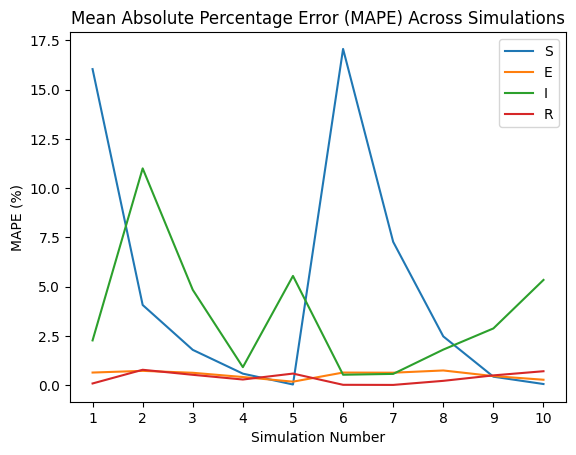

In [17]:
S["MAPE"].plot()
E["MAPE"].plot()
I["MAPE"].plot()
R["MAPE"].plot()
x = range(0,10)
labels = ("1", "2", '3', '4', '5', '6', '7', '8', '9', '10')
plt.legend(['S', 'E', 'I', 'R'])
plt.title('Mean Absolute Percentage Error (MAPE) Across Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('MAPE (%)')
plt.xticks(x, labels)

([<matplotlib.axis.XTick at 0x16ffeb168c0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

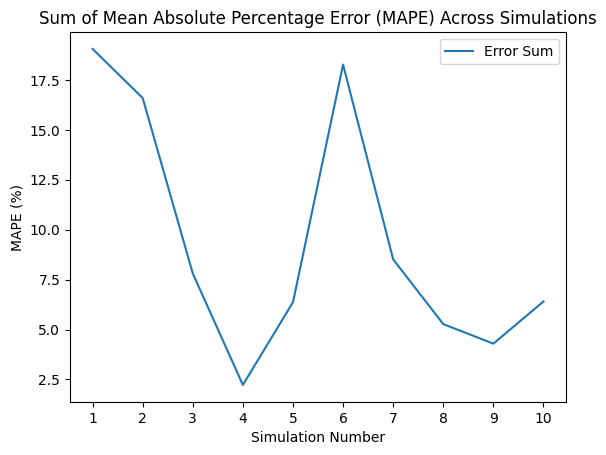

In [22]:
sum_mape = S["MAPE"] + E["MAPE"] + I["MAPE"] + R["MAPE"]
sum_mape.plot()
x = range(0,10)
labels = ("1", "2", '3', '4', '5', '6', '7', '8', '9', '10')
plt.legend(['Error Sum'])
plt.title('Sum of Mean Absolute Percentage Error (MAPE) Across Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('MAPE (%)')
plt.xticks(x, labels)

([<matplotlib.axis.XTick at 0x16ffe4bb220>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

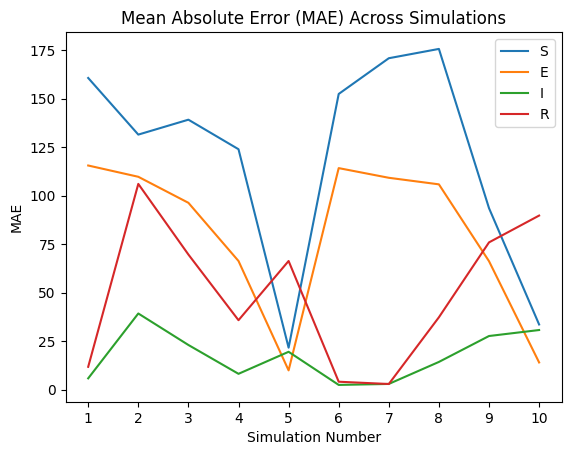

In [19]:
S["MAE"].plot()
E["MAE"].plot()
I["MAE"].plot()
R["MAE"].plot()
x = range(0,10)
labels = ("1", "2", '3', '4', '5', '6', '7', '8', '9', '10')
plt.legend(['S', 'E', 'I', 'R'])
plt.title('Mean Absolute Error (MAE) Across Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('MAE')
plt.xticks(x, labels)

([<matplotlib.axis.XTick at 0x16ffe4f2890>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

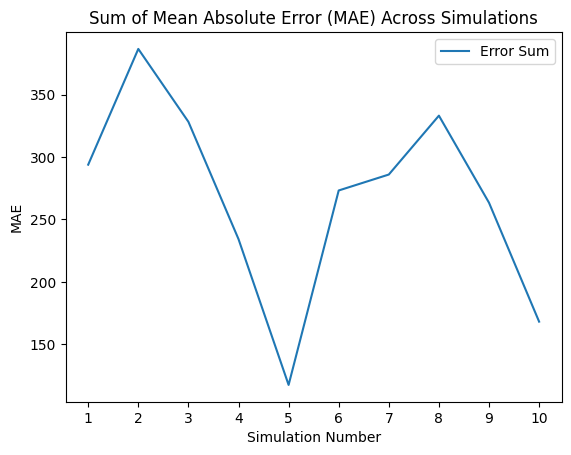

In [23]:
sum_mae = S["MAE"] + E["MAE"] + I["MAE"] + R["MAE"]
sum_mae.plot()
x = range(0,10)
labels = ("1", "2", '3', '4', '5', '6', '7', '8', '9', '10')
plt.legend(['Error Sum'])
plt.title('Sum of Mean Absolute Error (MAE) Across Simulations')
plt.xlabel('Simulation Number')
plt.ylabel('MAE')
plt.xticks(x, labels)